# Featuring

In [2]:
import pandas as pd 
import numpy as np

In [3]:
# import dataset yang telah dipreprocessing
df = pd.read_csv("Text_Preprocessing.csv", usecols=["Kategori", "Komentar_tokens_stemmed"])
df.columns = ["kategori", "komentar"]

df.head()

,kategori,komentar
0,Non-bullying,"['kakak', 'tidur', 'sudah', 'pagi', 'tidak bol..."
1,Non-bullying,"['makan', 'nasi', 'padang', 'saja', 'badan']"
2,Bullying,"['suka', 'cukur', 'jembut', 'manggung']"
3,Non-bullying,"['hai', 'kakak', 'isyana', 'ngefans', 'sekali'..."
4,Non-bullying,"['manusia', 'bidadari', 'sih', 'heran', 'deh',..."


# Scikit-Learn TF-IDF Formula
Formula untuk menghitung IDF pada Scikit-Learn berbeda, 

* jika parameter smooth_idf=True pada TfidfVectorizer
>idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1

* sebaliknya jika smooth_idf=False
>idf(t) = log [ n / df(t) ] + 1

pada featuring ini menggunakan smooth_idf=True, supaya kata-kata yang jarang muncul tetap memiliki nilai pada pembobotan 

# Menggunakan L2 Normalization
* L1 normalization memberikan bobot yang sama pada setiap nilai  
* L2 normalization memberikan bobot yang lebih besar pada nilai yang lebih besar dan bobot yang lebih kecil pada nilai yang lebih kecil

Sparse matrix dengan size (n_samples, n_feature) pada Scikit-Learn akan di normalisasi ke normalizer L2 by default, dengan formula,
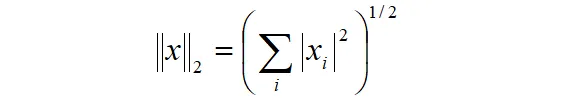

Kita dapat memilih untuk tidak menggunakan normalizer pada TfidfVectorizer dengan menambahkan parameter norm=None .

# Menghitung TF-IDF bigram dan trigram
Untuk menghitung TF-IDF bigram dan trigram menggunakan Scikit-Learn, kita dapat menambahkan argument ngram_range=(min_n, max_n). 

min_n dan max_n merupakan batasan minimum dan maksimum ngram yang akan digunakan pada fungsi TfidfVectorizer() maupun CountVectorizer() .

* ngram_range=(1,1) artinya hanya hitung TFIDF unigram,

* ngram_range=(1,2) artinya hitung TFIDF unigram dan bigram,

* ngram_range=(2,2) artinya hanya hitung TFIDF bigram,

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Feature Engineering 
print ("------- TF-IDF on data -------")

# mendapatkan TF
vect = CountVectorizer(ngram_range=(1,1))
TF_vec = vect.fit_transform(df['komentar'])

# normalisasi pada vektor TF
# Hal ini dilakukan untuk memastikan bahwa vektor memiliki panjang Euclidean yang sama.
norm_TF_vec = normalize(TF_vec, axis=1)

# Menghitung TF-IDF
tf_idf = TfidfVectorizer(binary=True, ngram_range=(1,1), smooth_idf=True)
tfs = tf_idf.fit_transform(df['komentar'])
IDF_vec = tf_idf.idf_

tfidf_mat = tfs.multiply(IDF_vec).toarray()


print("TF-IDF ", type(tfs), tfs.shape)

------- TF-IDF on data -------
TF-IDF  <class 'scipy.sparse.csr.csr_matrix'> (650, 1319)


In [5]:
# Visualisasi tabel
a = tf_idf.get_feature_names()
tf_tb = norm_TF_vec.multiply(IDF_vec).toarray()
dfbtf =pd.DataFrame(data=tfidf_mat,columns=[a])
dfbtf


,aamiin,abai,abal,abu,activity,ada,adab,adam,adaptasi,adi,...,yemuke,yesus,you,younger,youtube,youtuber,yuhu,yutuber,ziu,zo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#menampilkan hasil term dengan TF-IDF terbesar
terms = tf_idf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
47,anjing,69.297764
551,kamu,67.922752
224,cantik,60.850035
1053,saja,56.056245
1164,sudah,55.631325
...,...,...
176,bocor,1.908859
1121,siain,1.908859
355,for,1.891404
499,jakarta,1.891404


# Modeling

In [45]:
# import model
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# tentukan jumlah pengulangan
n_repeats = 30

# List untuk menyimpan rata-rata akurasi
average_accuracies = []

# membagi data ke training and testing sets
X = tfidf_mat #hasil featuring
y = df['kategori']#label pada dataset

# Membuat objek untuk setiap model
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
          'Gradient Boosting': GradientBoostingClassifier(),
          'Multinomial Naive Bayes': MultinomialNB()}

# Melakukan 30 iterasi untuk setiap model dengan test set yang berbeda
for model_name, model in models.items():
    accuracy_list = []  # Untuk menyimpan akurasi pada setiap iterasi
    print(f"Model: {model_name}")
    
    for i in range(n_repeats):
        # test_size 0.2 artinya 20% dari total data akan dijadikan test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Melatih model menggunakan data training
        model.fit(X_train, y_train)
        
        # Melakukan prediksi pada data testing
        y_pred = model.predict(X_test)

        # Save the train-test split data using pickle
        with open('true_labels.pkl', 'wb') as f:
            pickle.dump((X_train, X_test, y_train, y_test), f)
        
        # Menghitung akurasi pada setiap iterasi
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Iterasi {i+1} - Accuracy: {accuracy}")
        accuracy_list.append(accuracy)

    accuracy_mean = np.mean(accuracy_list)
    average_accuracies.append(accuracy_mean)

    print()



Model: Logistic Regression
Iterasi 1 - Accuracy: 0.9
Iterasi 2 - Accuracy: 0.9076923076923077
Iterasi 3 - Accuracy: 0.8692307692307693
Iterasi 4 - Accuracy: 0.8615384615384616
Iterasi 5 - Accuracy: 0.8307692307692308
Iterasi 6 - Accuracy: 0.9076923076923077
Iterasi 7 - Accuracy: 0.8307692307692308
Iterasi 8 - Accuracy: 0.8692307692307693
Iterasi 9 - Accuracy: 0.9076923076923077
Iterasi 10 - Accuracy: 0.8615384615384616
Iterasi 11 - Accuracy: 0.8923076923076924
Iterasi 12 - Accuracy: 0.8307692307692308
Iterasi 13 - Accuracy: 0.9
Iterasi 14 - Accuracy: 0.9
Iterasi 15 - Accuracy: 0.8615384615384616
Iterasi 16 - Accuracy: 0.8692307692307693
Iterasi 17 - Accuracy: 0.8692307692307693
Iterasi 18 - Accuracy: 0.9
Iterasi 19 - Accuracy: 0.8384615384615385
Iterasi 20 - Accuracy: 0.8461538461538461
Iterasi 21 - Accuracy: 0.8769230769230769
Iterasi 22 - Accuracy: 0.8461538461538461
Iterasi 23 - Accuracy: 0.8461538461538461
Iterasi 24 - Accuracy: 0.8461538461538461
Iterasi 25 - Accuracy: 0.9
Iterasi

In [46]:
# Menampilkan rata-rata akurasi
print("Average accuracy:")
for model_name, accuracy in zip(models.keys(), average_accuracies):
    print(f"{model_name}: {accuracy}")
    
print("\nData distribution:\n- Train: {}  \n- Test: {}".format(len(y_train),len(y_test)))

Average accuracy:
Logistic Regression: 0.8687179487179486
Decision Tree: 0.7641025641025639
Random Forest: 0.8241025641025641
K-Nearest Neighbors: 0.6053846153846154
Gradient Boosting: 0.7899999999999999
Multinomial Naive Bayes: 0.8387179487179487

Data distribution:
- Train: 520  
- Test: 130


In [49]:
# save model
for model_name, model in models.items():
    # Menyimpan model ke file
    filename = f'{model_name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    
    print(f"Model '{model_name}' telah disimpan dalam file {filename}")

Model 'Logistic Regression' telah disimpan dalam file Logistic Regression.pkl
Model 'Decision Tree' telah disimpan dalam file Decision Tree.pkl
Model 'Random Forest' telah disimpan dalam file Random Forest.pkl
Model 'K-Nearest Neighbors' telah disimpan dalam file K-Nearest Neighbors.pkl
Model 'Gradient Boosting' telah disimpan dalam file Gradient Boosting.pkl
Model 'Multinomial Naive Bayes' telah disimpan dalam file Multinomial Naive Bayes.pkl


In [50]:
#Load model to compare the results
# Muat model Logistic Regression
with open('Logistic Regression.pkl', 'rb') as f:
    logreg_model = pickle.load(f)

# Muat model Decision Tree
with open('Decision Tree.pkl', 'rb') as f:
    dt_model = pickle.load(f)

# Muat model Random Forest
with open('Random Forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Muat model K-Nearest Neighbors
with open('K-Nearest Neighbors.pkl', 'rb') as f:
    knn_model = pickle.load(f)

# Muat model Gradient Boosting
with open('Gradient Boosting.pkl', 'rb') as f:
    gb_model = pickle.load(f)

# Muat model Naive Bayes
with open('Multinomial Naive Bayes.pkl', 'rb') as f:
    nb_model = pickle.load(f)

# Muat model Naive Bayes
with open('true_labels.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [51]:
# Gunakan model yang telah dimuat kembali dengan looping
models_to_use = [logreg_model, dt_model, rf_model, knn_model, gb_model, nb_model]
for i, model in enumerate(models_to_use):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Bullying')
    recall = recall_score(y_test, y_pred, pos_label='Bullying')
    f1_ = f1_score(y_test, y_pred, pos_label='Bullying')

    # Menampilkan hasil evaluasi model
    print(model)
    print("-----------------------------------")
    print("Akurasi:", accuracy)
    print("Presisi:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_)
    print(" ")

LogisticRegression()
-----------------------------------
Akurasi: 0.9538461538461539
Presisi: 0.9705882352941176
Recall: 0.9428571428571428
F1-Score: 0.9565217391304348
 
DecisionTreeClassifier()
-----------------------------------
Akurasi: 0.9307692307692308
Presisi: 0.9420289855072463
Recall: 0.9285714285714286
F1-Score: 0.935251798561151
 
RandomForestClassifier()
-----------------------------------
Akurasi: 0.9769230769230769
Presisi: 0.9855072463768116
Recall: 0.9714285714285714
F1-Score: 0.9784172661870504
 
KNeighborsClassifier(algorithm='brute', n_neighbors=3)
-----------------------------------
Akurasi: 0.7153846153846154
Presisi: 0.6542056074766355
Recall: 1.0
F1-Score: 0.7909604519774012
 
GradientBoostingClassifier()
-----------------------------------
Akurasi: 0.9230769230769231
Presisi: 0.9838709677419355
Recall: 0.8714285714285714
F1-Score: 0.9242424242424242
 
MultinomialNB()
-----------------------------------
Akurasi: 0.8384615384615385
Presisi: 0.855072463768116
Reca